In [1]:
import numpy as np
import pandas as pd
import umap
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:\\Users\\nilav\\NCI Cell Lines\\Paclitaxel_metabolic_NCI.csv')
data.head(2)

,Cell Line,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,...,O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-[6-deoxy-a-L-galactopyranosyl-(1->4)]-O-b-D-galactopyranosyl-(1->4)-O-[6-deoxy-a-L-galactopyranosyl-(1->3)]-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso6] ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),cells,Cell names,Paclitaxel
0,Breast_BT549,0.021811,0.006137,1.801231,0.178675,0.031762,0.143416,0.004437,0.001118,0.002353,...,0.036367,0.025836,0.075427,0.036502,0.019935,0.032820,0.039391,BT549,BR:BT-549,5.573385
1,Breast_HS578T,0.010611,0.006815,0.884542,0.093390,0.016027,0.037372,NaN,0.005778,0.003199,...,0.024981,0.013982,0.054200,0.029125,0.010750,0.015981,0.035154,HS578T,BR:HS 578T,6.502923


In [3]:
drug = data.pop('Paclitaxel')
drug.head()

0    5.573385
1    6.502923
2    6.085692
3    5.334615
4    7.409077
Name: Paclitaxel, dtype: float64

In [4]:
X = data.select_dtypes('float64')
X.head(2)

,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,Acrylamide,...,PIP2(16:0/18:1(11Z)) ; PIP2(16:0/18:1(9Z)) ; PIP2(16:1(9Z)/18:0) ; PIP2(18:0/16:1(9Z)) ; PIP2(18:1(11Z)/16:0) ; PIP2(18:1(9Z)/16:0),"TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-[6-deoxy-a-L-galactopyranosyl-(1->4)]-O-b-D-galactopyranosyl-(1->4)-O-[6-deoxy-a-L-galactopyranosyl-(1->3)]-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso6] ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z))
0,0.021811,0.006137,1.801231,0.178675,0.031762,0.143416,0.004437,0.001118,0.002353,0.013185,...,0.071269,0.029462,0.029300,0.036367,0.025836,0.075427,0.036502,0.019935,0.032820,0.039391
1,0.010611,0.006815,0.884542,0.093390,0.016027,0.037372,NaN,0.005778,0.003199,0.011203,...,0.059958,0.026807,0.021282,0.024981,0.013982,0.054200,0.029125,0.010750,0.015981,0.035154


In [5]:
X.fillna(0.0, inplace=True)

In [6]:
labels = []
drug_mean = drug.mean()
for i in drug:
    if i >= drug_mean:
        labels.append('N')
    else:
        labels.append('R')
y = pd.Series(labels)

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_transformed = pd.DataFrame(pca.fit_transform(X))

In [9]:
X_transformed

,0,1
0,75.948428,20.975309
1,75.463396,48.163553
2,58.251029,5.678188
3,-1.845206,17.940824
4,-5.956409,-3.460507
5,-6.797491,-11.001406
6,33.063437,25.663462
7,-23.751385,46.706247
8,55.451309,-14.228585
9,19.827085,-9.665975


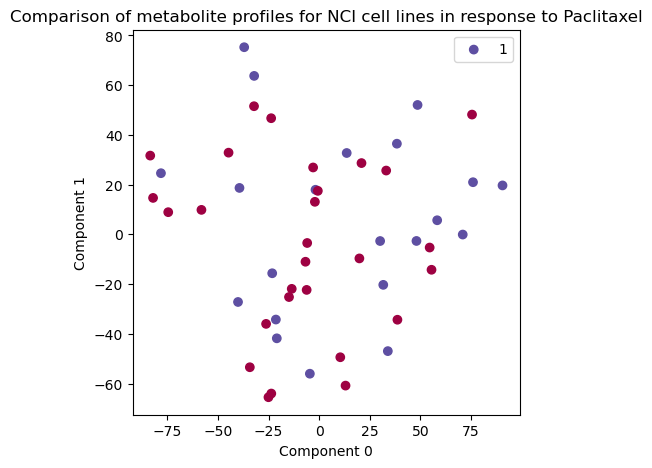

In [10]:
fig, ax = plt.subplots(figsize = (5,5))
plt.scatter(x = X_transformed.iloc[:, :1], y = X_transformed.iloc[:, 1:2], c=y, cmap='Spectral', alpha = 1.0)
ax.set_title('Comparison of metabolite profiles for NCI cell lines in response to Paclitaxel')
ax.set_xlabel('Component 0')
ax.set_ylabel('Component 1')
ax.legend(y)
plt.show()